In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [27]:
file_path = '../data/fire.csv'
fire_df = pd.read_csv(file_path)
fire_df

,lat,lon,burned_area,fraction_of_burnable_area,lat_bounds,lon_bounds,year,month
0,51.875,-1.625,53664.0,0.974570,52.00,-1.75,2006,7
1,51.875,-1.625,53664.0,0.974570,51.75,-1.50,2006,7
2,50.625,24.625,697640.0,0.966152,50.75,24.50,2006,7
3,50.625,24.625,697640.0,0.966152,50.50,24.75,2006,7
4,50.625,26.375,590311.0,0.908394,50.75,26.25,2006,7
...,...,...,...,...,...,...,...,...
38377,34.125,-5.125,214658.0,0.938995,34.00,-5.00,2013,7
38378,33.625,-6.625,2575904.0,0.998999,33.75,-6.75,2013,7
38379,33.625,-6.625,2575904.0,0.998999,33.50,-6.50,2013,7
38380,33.625,-6.375,1019628.0,0.999333,33.75,-6.50,2013,7


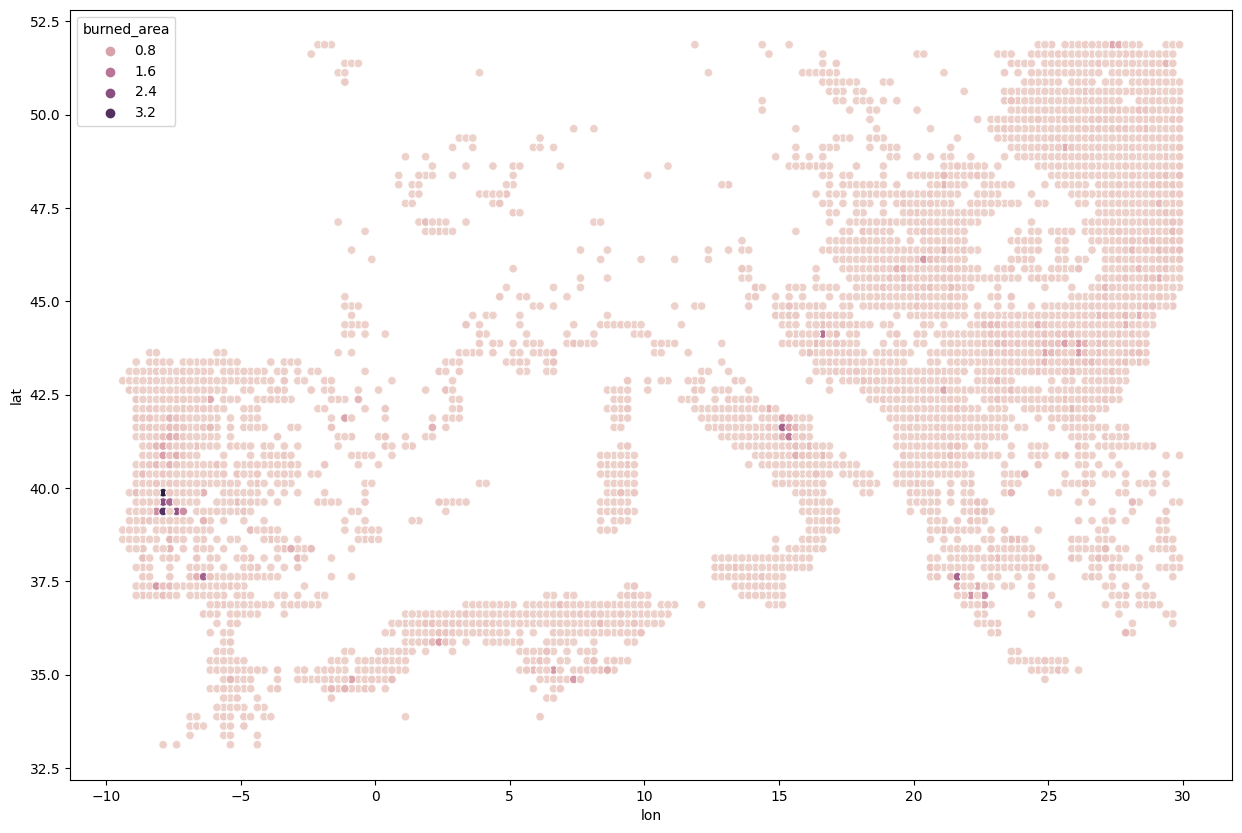

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=fire_df, x='lon', y='lat', hue = 'burned_area');

map is not complete because when preprocessing I took only values where burnable area was larger than 1 and burned area was more than 1m2

In [29]:
climate_df = pd.read_csv('../data/climate.csv')
climate_df.head()

,Unnamed: 0,lon,lat,year,month,tas,tasmax,pr
0,0,-10.0,33.0,2001,7,NaN,NaN,NaN
1,1,-10.0,34.0,2001,7,NaN,NaN,NaN
2,2,-10.0,35.0,2001,7,NaN,NaN,NaN
3,3,-10.0,36.0,2001,7,NaN,NaN,NaN
4,4,-10.0,37.0,2001,7,NaN,NaN,NaN


In [30]:
fire_cliamte = fire_df.merge(
    climate_df,
    how='left',
    left_on=['lat_bounds', 'lon_bounds', 'year', 'month'],
    right_on=['lat', 'lon', 'year', 'month']
    )

fire_cliamte.head()

,lat_x,lon_x,burned_area,fraction_of_burnable_area,lat_bounds,lon_bounds,year,month,Unnamed: 0,lon_y,lat_y,tas,tasmax,pr
0,51.875,-1.625,53664.0,0.974570,52.00,-1.75,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
1,51.875,-1.625,53664.0,0.974570,51.75,-1.50,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
2,50.625,24.625,697640.0,0.966152,50.75,24.50,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
3,50.625,24.625,697640.0,0.966152,50.50,24.75,2006,7,NaN,NaN,NaN,NaN,NaN,NaN
4,50.625,26.375,590311.0,0.908394,50.75,26.25,2006,7,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
fire_climate_filtered = fire_cliamte.drop(['Unnamed: 0', 'lon_y', 'lat_y', 'lat_bounds', 'lon_bounds'], axis=1).dropna().drop_duplicates()
fire_climate_filtered.head()

,lat_x,lon_x,burned_area,fraction_of_burnable_area,year,month,tas,tasmax,pr
20,49.875,26.125,3273544.0,0.927671,2006,7,20.900000,28.1,55.175
28,49.875,27.125,697640.0,0.909953,2006,7,21.825000,29.0,46.325
34,49.875,28.125,107329.0,0.933534,2006,7,20.450000,27.2,48.200
42,49.875,29.125,3058886.0,0.966792,2006,7,19.525002,25.4,47.275
123,49.125,24.875,7030071.0,0.954463,2006,7,20.000000,26.5,57.375


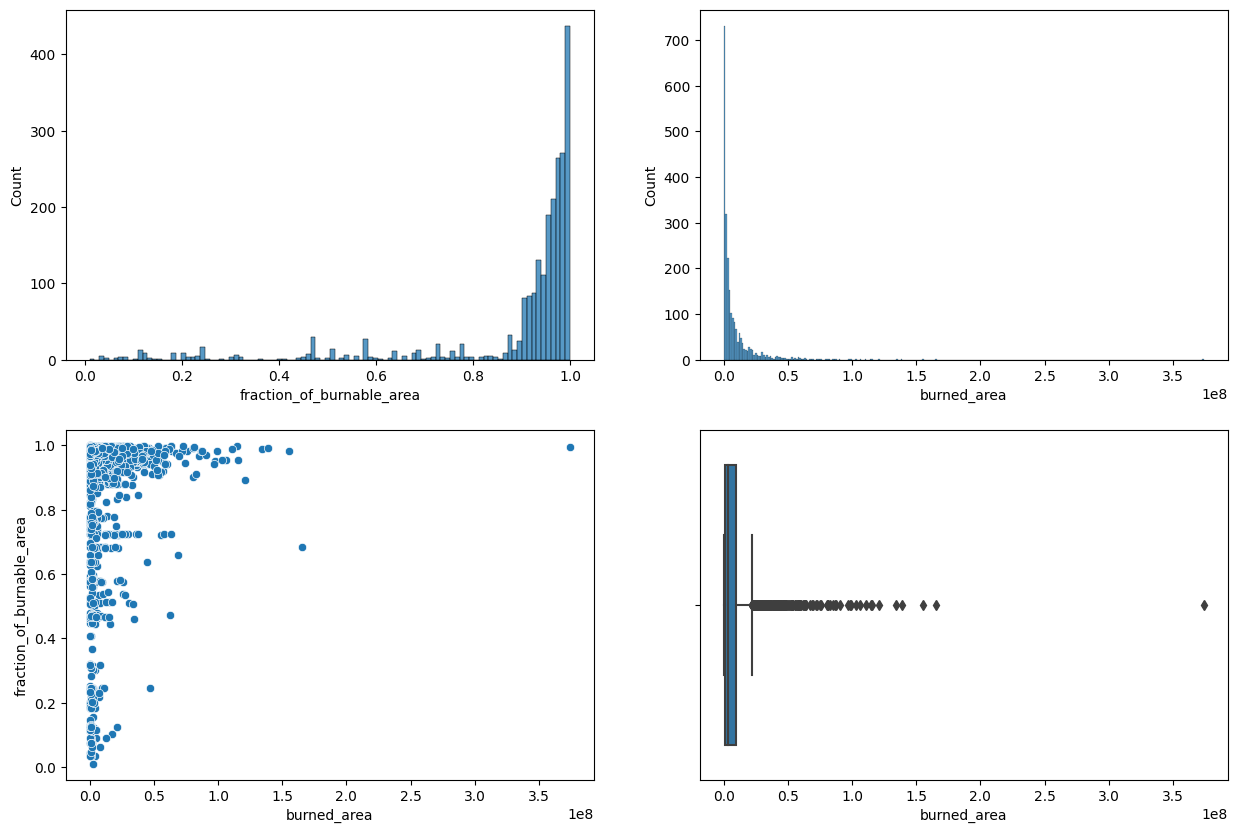

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(fire_climate_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_climate_filtered['burned_area'], ax=ax2)
sns.scatterplot(data=fire_climate_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax3)
sns.boxplot(data = fire_climate_filtered, x= 'burned_area', ax=ax4)
plt.show();

 # filtering dataset

1. seems there is one outlier in burned area 
2. the distribution for 'fraction_of_burnable_area' is skewd and data wit less than 80% could be removed

In [33]:
fire_climate_filtered = fire_climate_filtered[fire_climate_filtered['fraction_of_burnable_area'] > 0.8]
mask = (fire_climate_filtered['burned_area'] < 200_000_000) #& (y_train['burned_area'] > 100_000)
fire_climate_filtered = fire_climate_filtered[mask].reset_index(drop=True)
fire_climate_filtered.shape

(1961, 9)

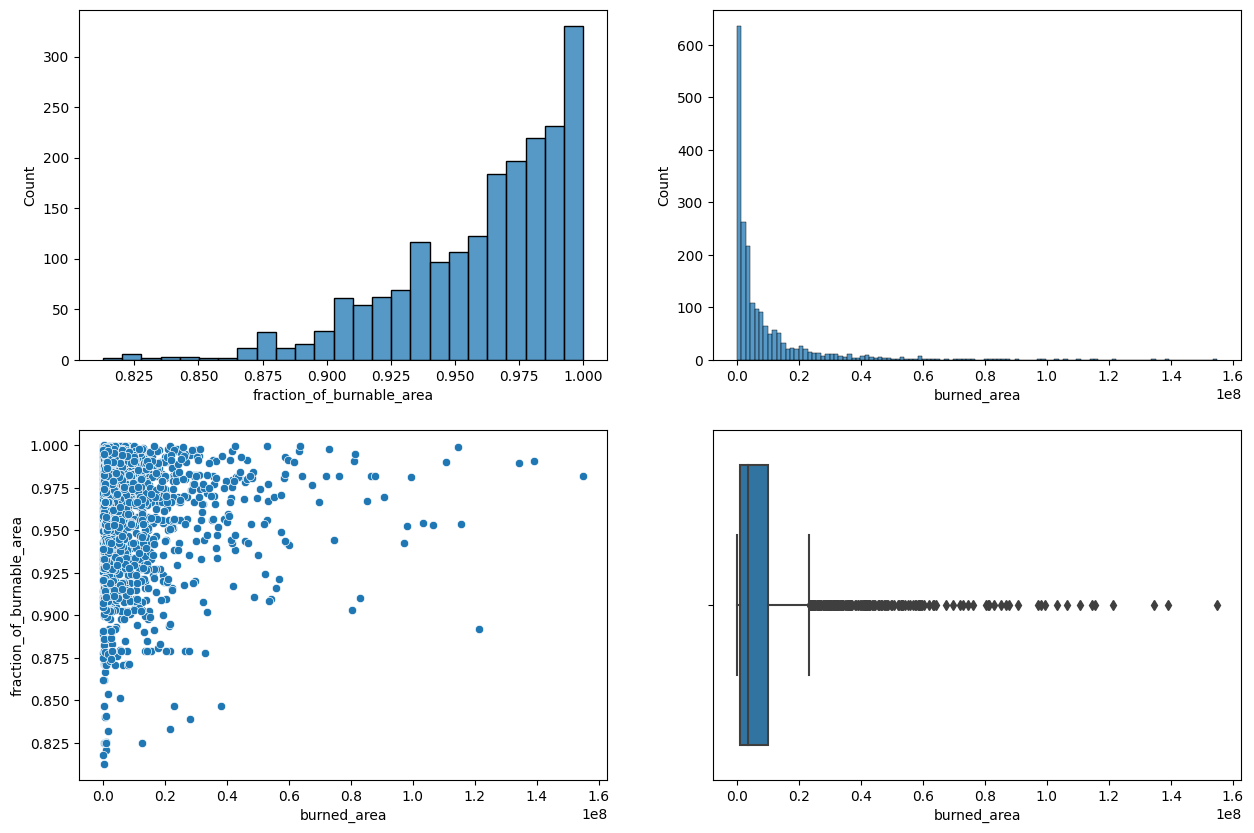

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(fire_climate_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_climate_filtered['burned_area'], ax=ax2)
sns.scatterplot(data=fire_climate_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax3)
sns.boxplot(data = fire_climate_filtered, x= 'burned_area', ax=ax4)
plt.show();

I would not remove more of the burned area 'outliers' since the outliers are what we are actually looking for

# Splitting the data

In [35]:
y = fire_climate_filtered['burned_area']
X = fire_climate_filtered.drop('burned_area', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (1372, 8)
y_train:  (1372,)


# Normalisation

## longitude and latitude

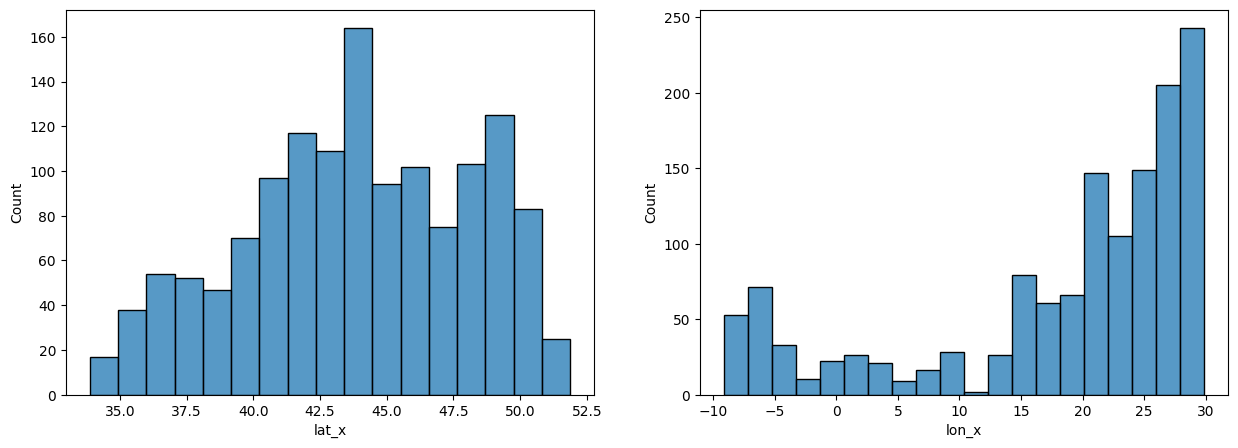

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['lat_x'], ax= ax1)
sns.histplot(X_train['lon_x'], ax= ax2);

the lon and lat columns need normalising but I am not sure what is the best approach.<br />
ChatGPT recommended to map longitude and latitude to x and y coordinates -> represents the data in a two-dimensional space

x = cos(lat) * cos(lon) <br />
y = cos(lat) * sin(lon)

In [39]:
X_train['x'] = np.cos(X_train['lat_x']) * np.cos(X_train['lon_x'])
X_train['y'] = np.cos(X_train['lat_x']) * np.sin(X_train['lon_x'])
X_train = X_train.drop(['lat_x', 'lon_x'], axis =1).reset_index(drop = True)

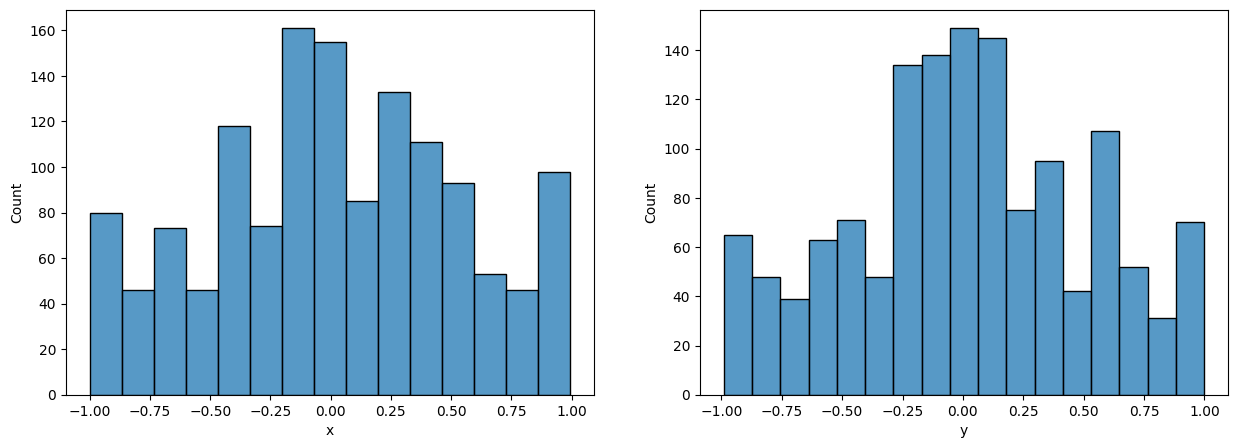

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['x'], ax= ax1)
sns.histplot(X_train['y'], ax= ax2);

this seems better, both coordinates have normal distribution

In [41]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (1372, 8)
y_train:  (1372,)


## time columns

In [42]:
# we have only one month atm so I am dropping it for now
X_train = X_train.drop('month', axis=1)

In [43]:
# for now I am treating year as ordinal value. We will need to discuss how to treat it properly later
o_encoder = OrdinalEncoder(categories = [[2001, 2002, 2003, 2004, 2005,
                                         2006, 2007, 2008, 2009, 2010,
                                         2011, 2012, 2013, 2014, 2015, 
                                         2016, 2017, 2018, 2019]])

o_encoder.fit(X_train[['year']])
X_train['year'] = o_encoder.transform(X_train[['year']])

X_train.head()

,fraction_of_burnable_area,year,tas,tasmax,pr,x,y
0,0.974600,2.0,19.275000,25.800001,26.900000,-0.332135,0.299278
1,0.965926,14.0,20.300001,26.700000,50.550003,0.924698,-0.007158
2,0.976997,14.0,29.400002,38.300000,14.000000,0.718996,-0.440600
3,0.944083,6.0,25.150000,33.900000,0.225000,-0.165575,-0.544207
4,0.908564,13.0,21.675001,28.200000,102.950005,-0.547317,0.484464


# climate data

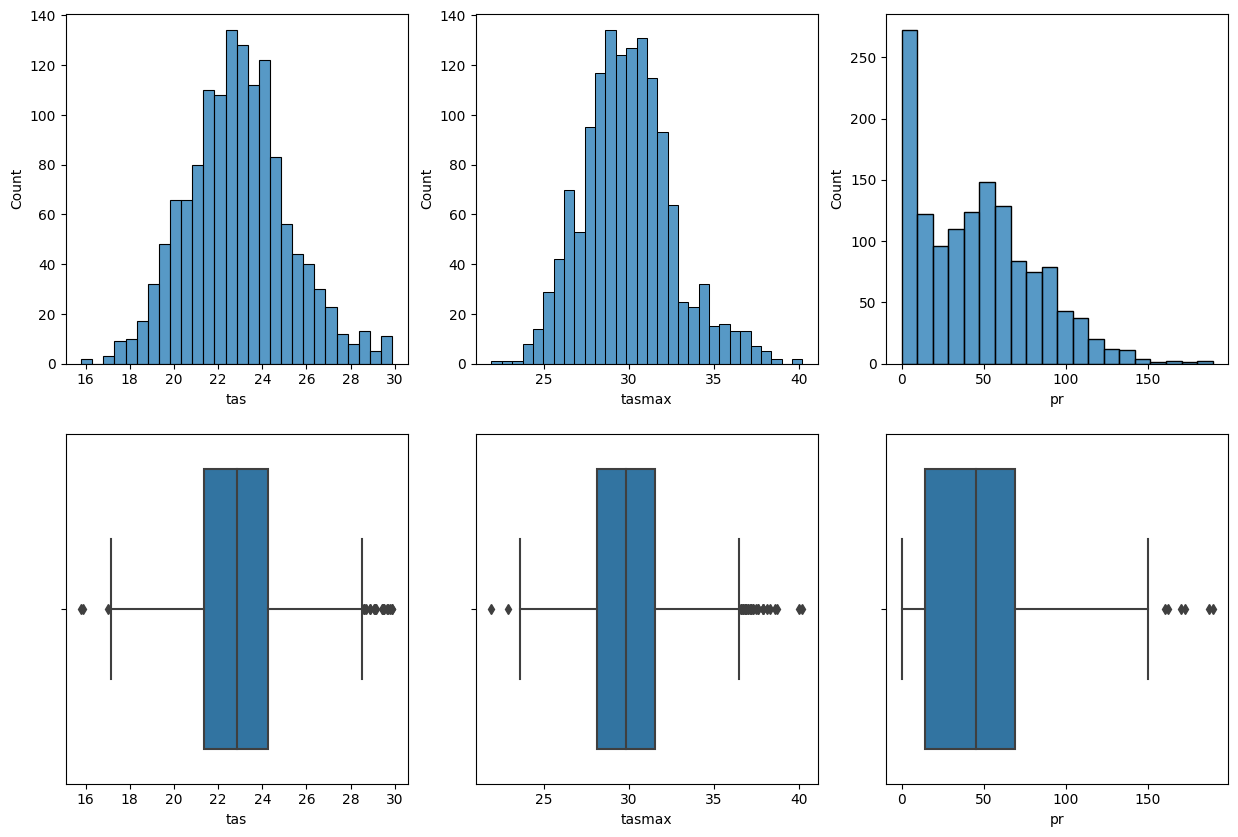

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['tas'], ax= ax1)
sns.histplot(X_train['tasmax'], ax= ax2)
sns.histplot(X_train['pr'], ax= ax3)


sns.boxplot(data = X_train, x= 'tas', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax', ax=ax5)
sns.boxplot(data = X_train, x= 'pr', ax=ax6);

tas and maxtas seem to have normal distribution but there are some outliers so I am using RobustScaler an all

In [45]:
rb_scaler = RobustScaler()
X_train[['tas', 'tasmax', 'pr']] = rb_scaler.fit_transform(X_train[['tas', 'tasmax', 'pr']])

X_train.head()

,fraction_of_burnable_area,year,tas,tasmax,pr,x,y
0,0.974600,2.0,-1.240781,-1.176471,-0.333523,-0.332135,0.299278
1,0.965926,14.0,-0.885032,-0.911765,0.097211,0.924698,-0.007158
2,0.976997,14.0,2.273320,2.500000,-0.568469,0.718996,-0.440600
3,0.944083,6.0,0.798265,1.205882,-0.819351,-0.165575,-0.544207
4,0.908564,13.0,-0.407809,-0.470589,1.051565,-0.547317,0.484464


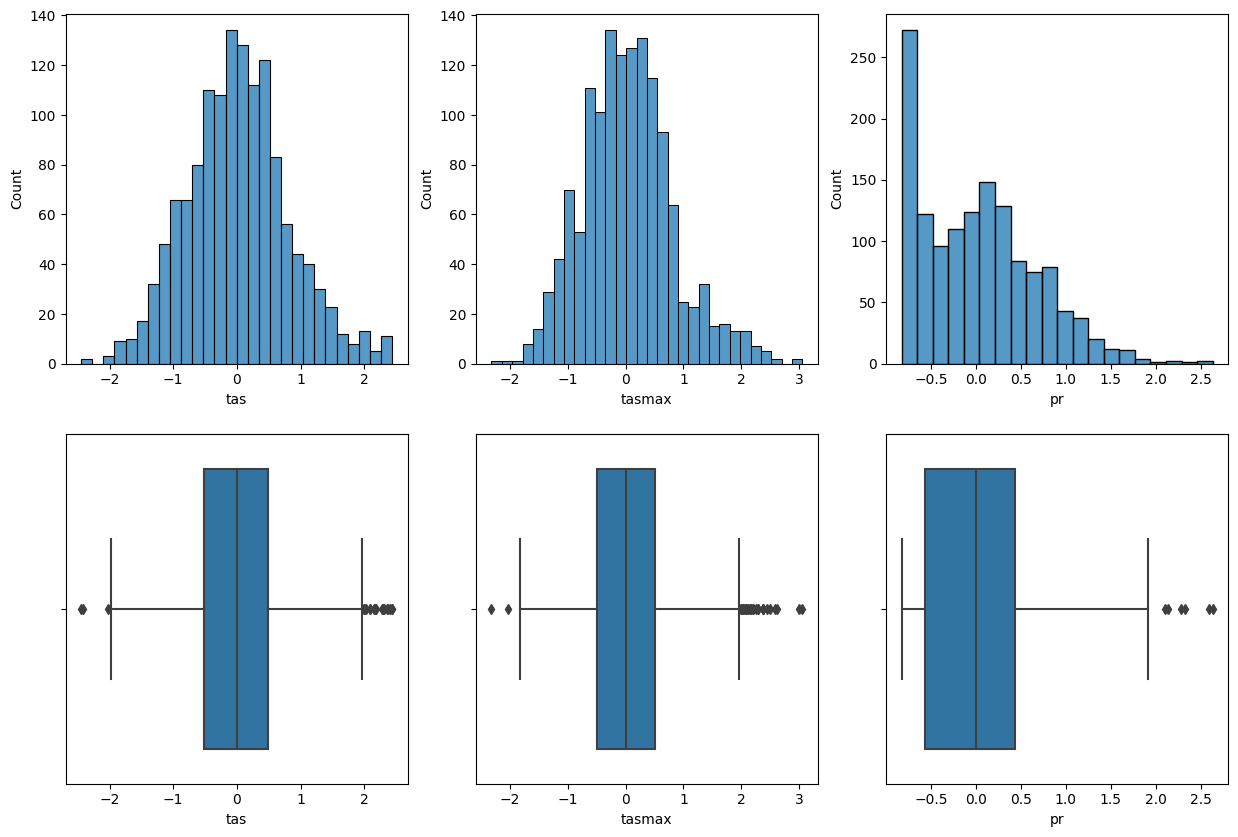

In [46]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['tas'], ax= ax1)
sns.histplot(X_train['tasmax'], ax= ax2)
sns.histplot(X_train['pr'], ax= ax3)


sns.boxplot(data = X_train, x= 'tas', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax', ax=ax5)
sns.boxplot(data = X_train, x= 'pr', ax=ax6);

data is rescaled

# fire data

### fraction_of_burnable_area
this is already in a range of 0 - 1

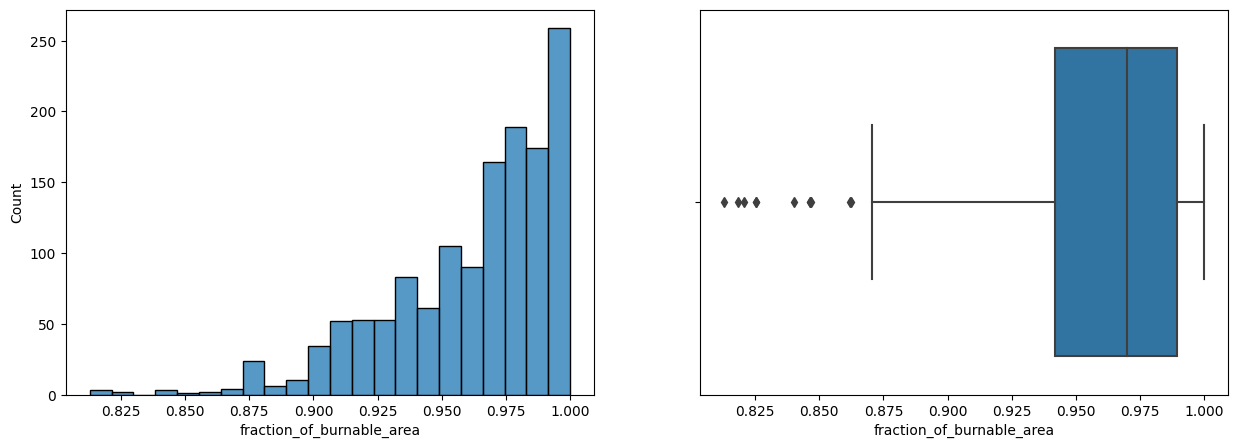

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

the distribution is not normal and there are outliers. I will perform Robust Scaer as well but not sure whether this is neccessary

In [48]:
rb_scaler2 = RobustScaler()
X_train[['fraction_of_burnable_area']] = rb_scaler.fit_transform(X_train[['fraction_of_burnable_area']])

X_train.head()

,fraction_of_burnable_area,year,tas,tasmax,pr,x,y
0,0.096006,2.0,-1.240781,-1.176471,-0.333523,-0.332135,0.299278
1,-0.086769,14.0,-0.885032,-0.911765,0.097211,0.924698,-0.007158
2,0.146525,14.0,2.273320,2.500000,-0.568469,0.718996,-0.440600
3,-0.547086,6.0,0.798265,1.205882,-0.819351,-0.165575,-0.544207
4,-1.295579,13.0,-0.407809,-0.470589,1.051565,-0.547317,0.484464


### burned area -> y

In [49]:
y_train.head()

1263     1556275.0
772      1234287.0
864      5473796.0
611     30052214.0
1023      858634.0
Name: burned_area, dtype: float64

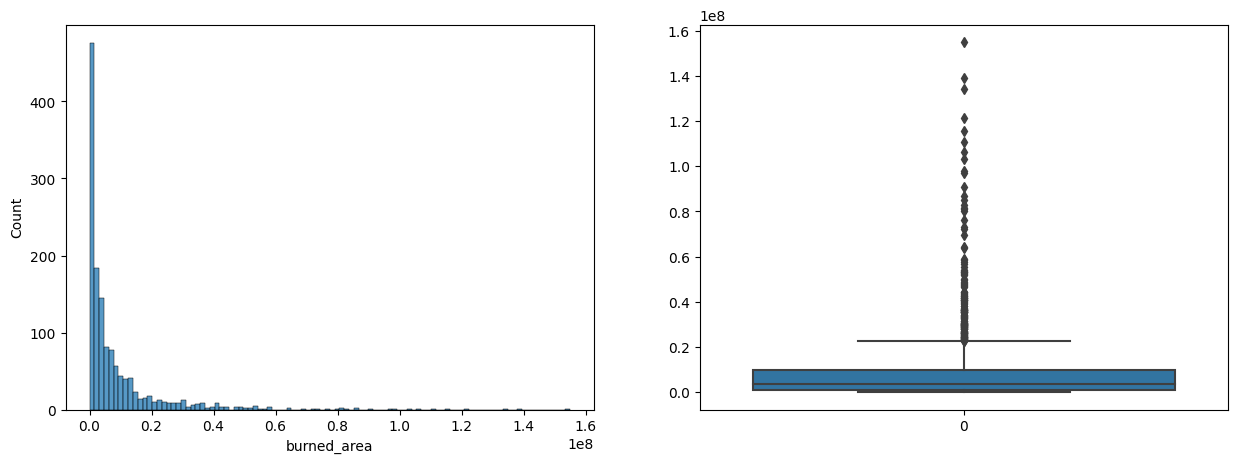

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_train, ax= ax1)
sns.boxplot(data = y_train, ax=ax2);

distribution is not normal and there are outliers but this is to be expected from th data and I dont knwo whether it should be treated